# Importing Libraries

In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Visualizing Single Audio

In [4]:
random_file_name = "Voice0133.wav"

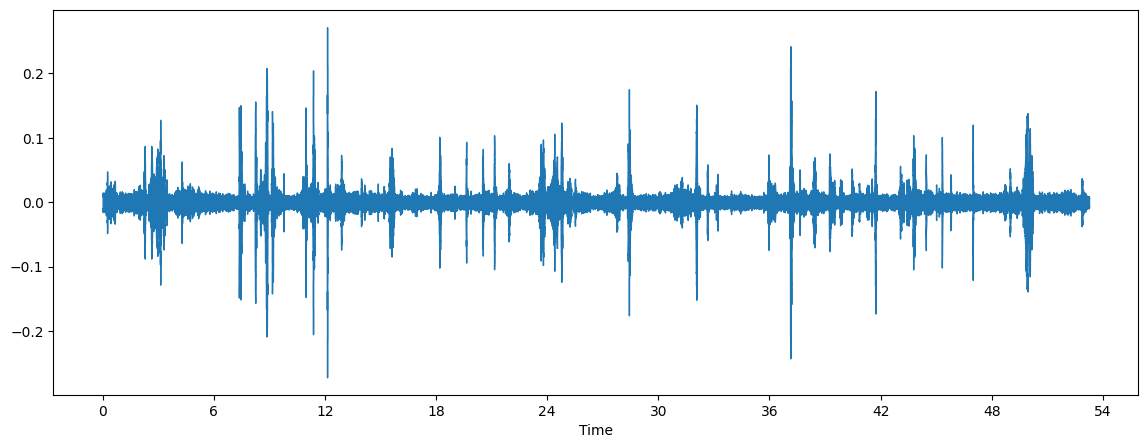

In [5]:
y, sr = librosa.load(random_file_name, sr=44100)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

In [6]:
y.shape

(2348888,)

# Playing Sound

In [7]:
from Ipython.display import Audio
Audio(data=y, rate=sr)

ModuleNotFoundError: No module named 'Ipython'

## Visualization on Chunks of Audio

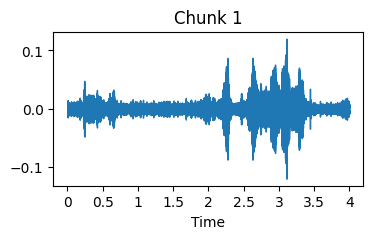

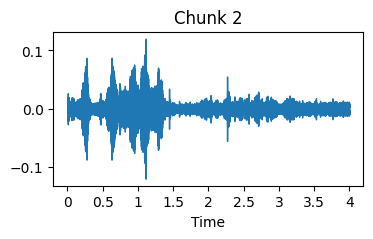

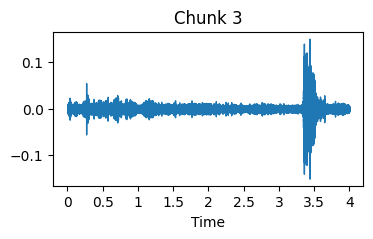

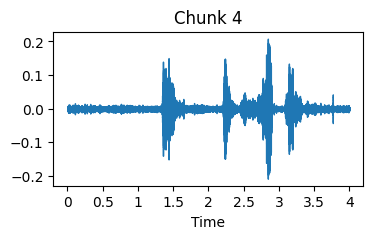

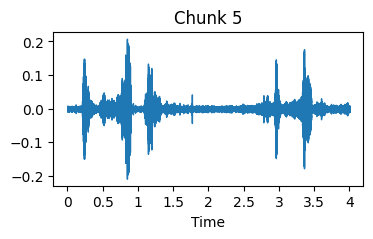

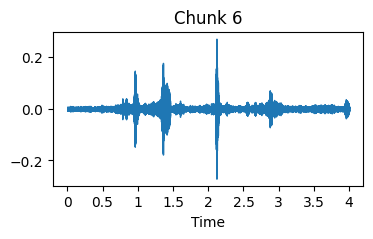

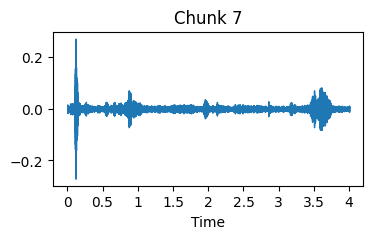

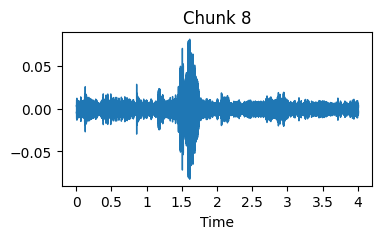

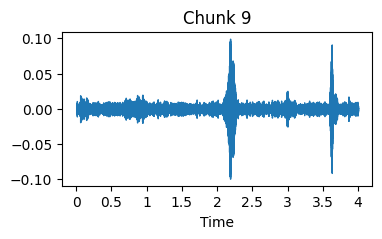

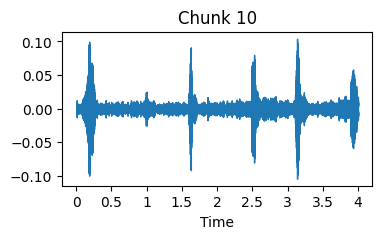

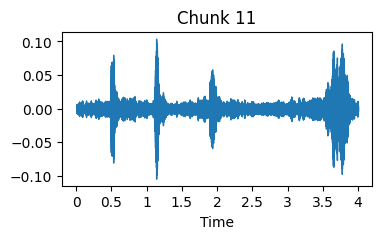

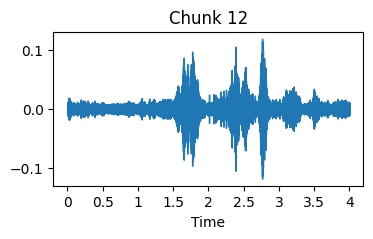

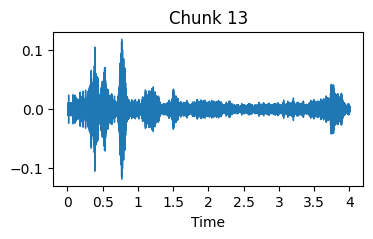

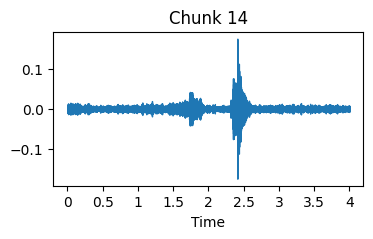

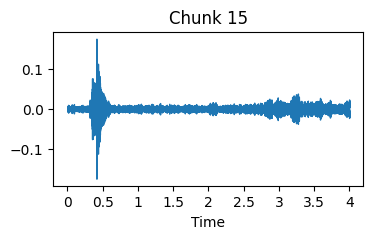

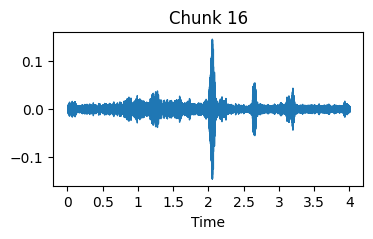

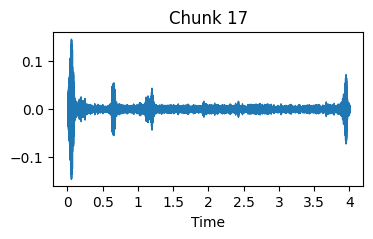

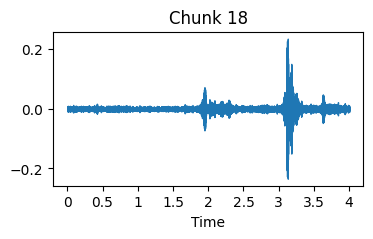

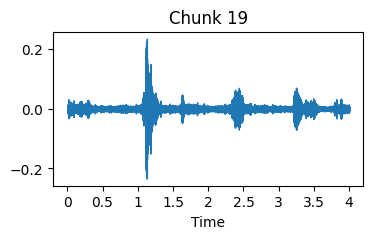

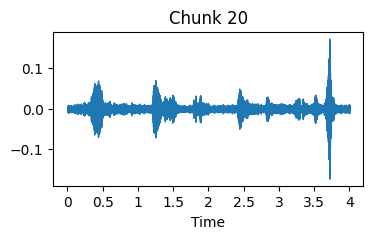

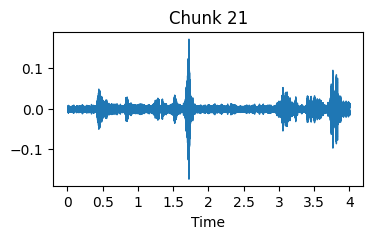

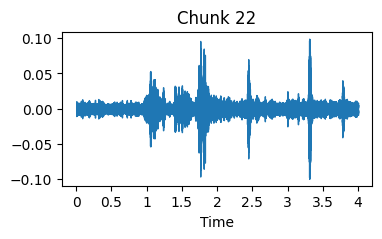

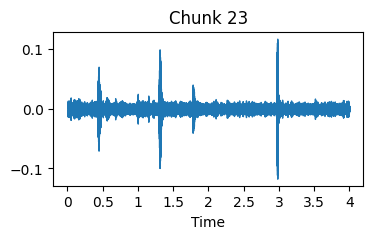

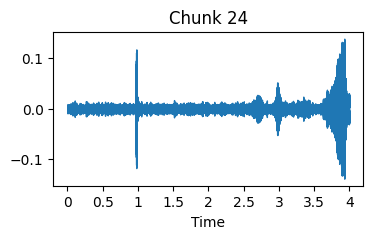

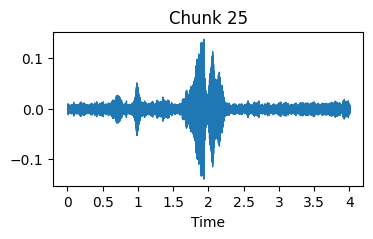

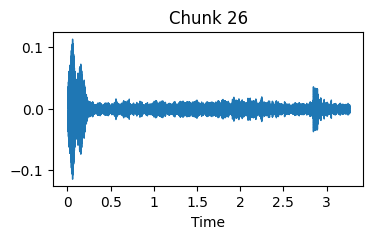

In [8]:
audio_path = "Voice0133.wav"
y, sr = librosa.load(audio_path, sr=None) # sr=None to keep the original sampling rate

# plt.figure(figsize=(14, 5))
# librosa.display.waveshow(y, sr=sr)


# define the duration of each chunk and overlap
chunk_duration = 4 # in seconds
overlap_duration = 2

# convert the duration to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# calculate the total number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# iterate over each chunks
for i in range(num_chunks):
    # calculate the start and end indices of the current chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # extract the current chunk
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.title(f"Chunk {i+1}")
    plt.show()



## Mel Spectrogram Visualization

In [9]:
# Plotting the Mel Spectrogram

def plot_melspectrogram(y, sr):
    # compute the mel spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    # convert to log scale (dB)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # visualize the mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()
    

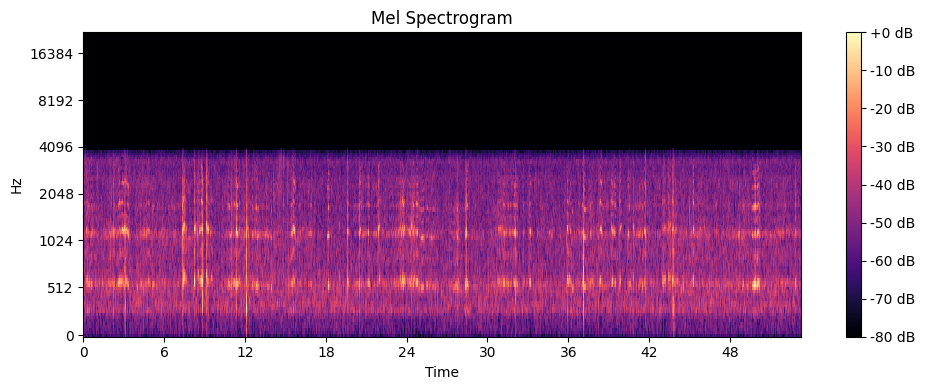

In [10]:
random_file_name = "Voice0133.wav"

y, sr = librosa.load(random_file_name, sr=44100)

plot_melspectrogram(y, sr)

In [11]:
def plot_melspectrogram_chunks(y, sr):
    """
    Plot the mel spectrogram of each chunk of an audio file.
    """
    # Calculate the number of chunks
    chunk_samples = 2 * sr
    overlap_samples = 1 * sr

    # calculate the total number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    # iterate over each chunks
    for i in range(num_chunks):
        # calculate the start and end indices of the current chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        # extract the current chunk
        chunk = y[start:end]

        # compute the mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        print(mel_spectrogram.shape)

        # visualize the mel spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spectrogram, x_axis='time', y_axis='mel', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Chunk {i+1}")
        plt.tight_layout()
        plt.show()

(128, 32)


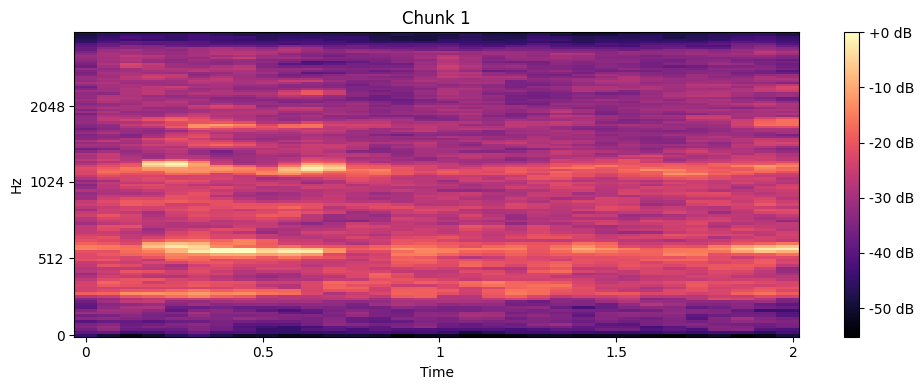

(128, 32)


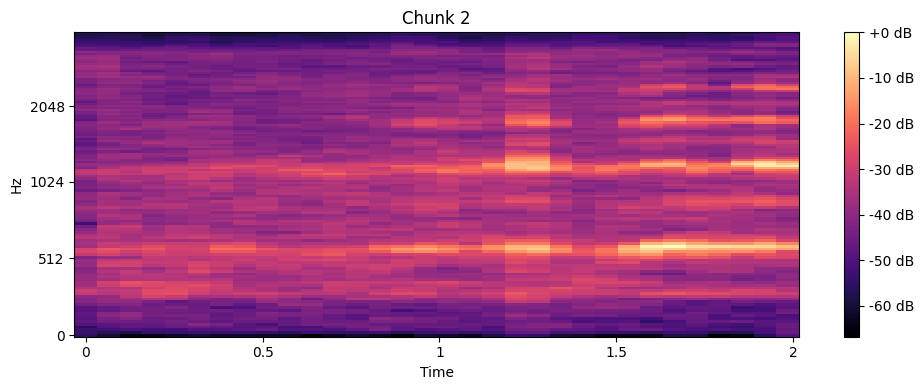

(128, 32)


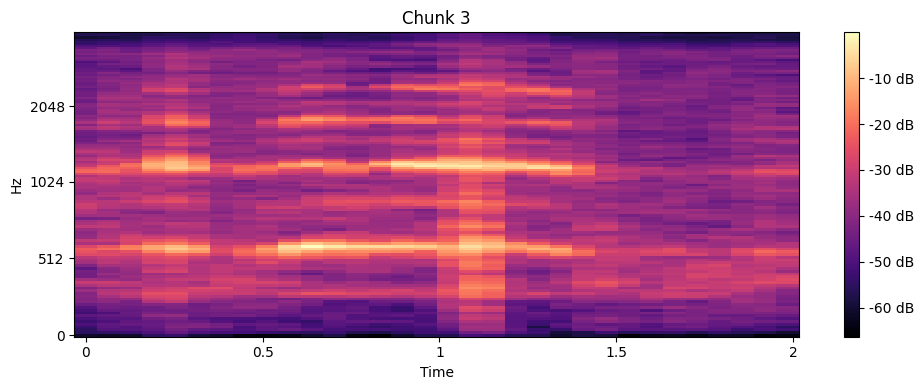

(128, 32)


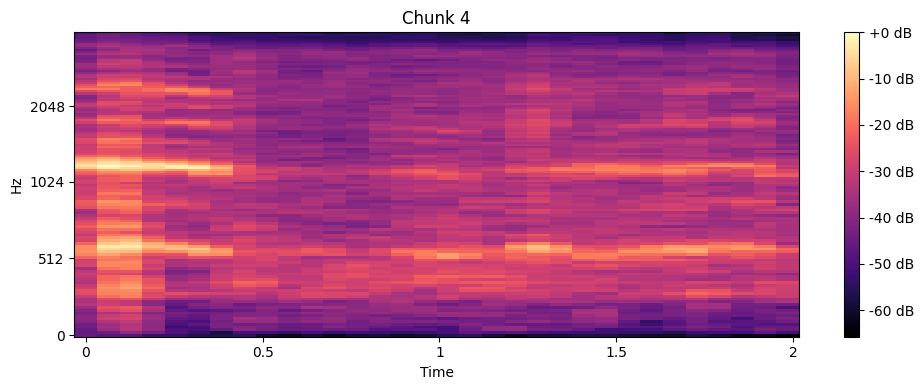

(128, 32)


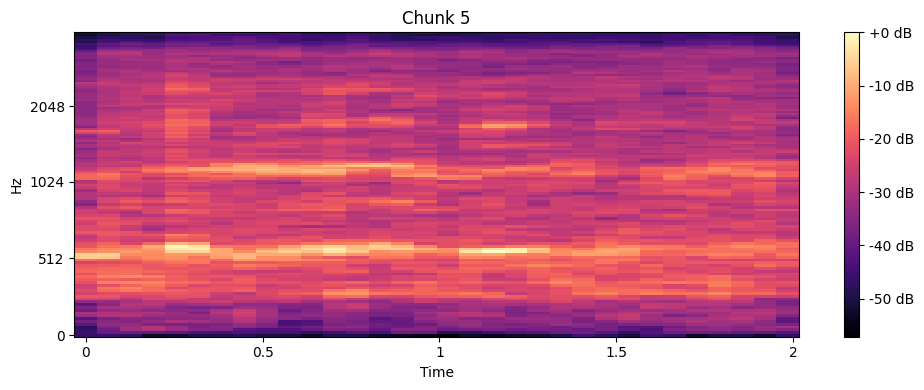

(128, 32)


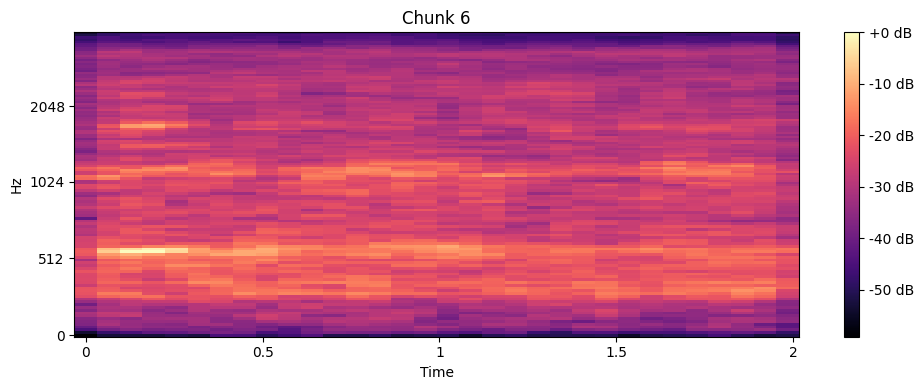

(128, 32)


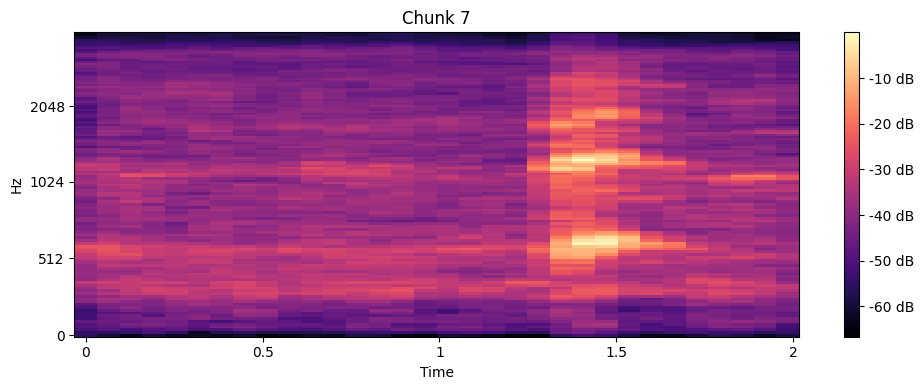

(128, 32)


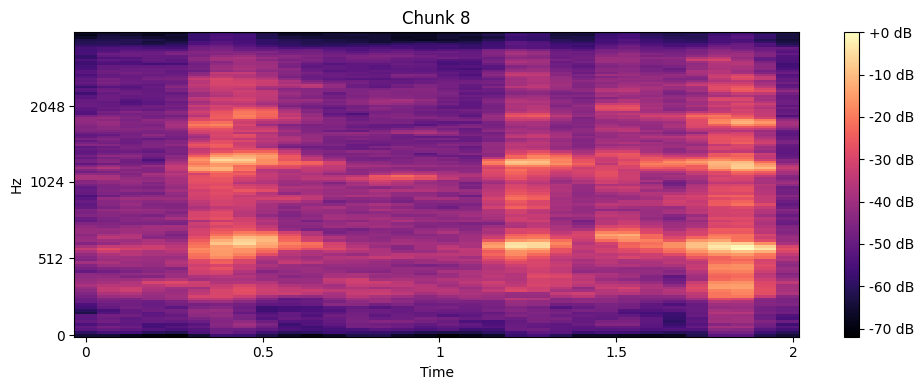

(128, 32)


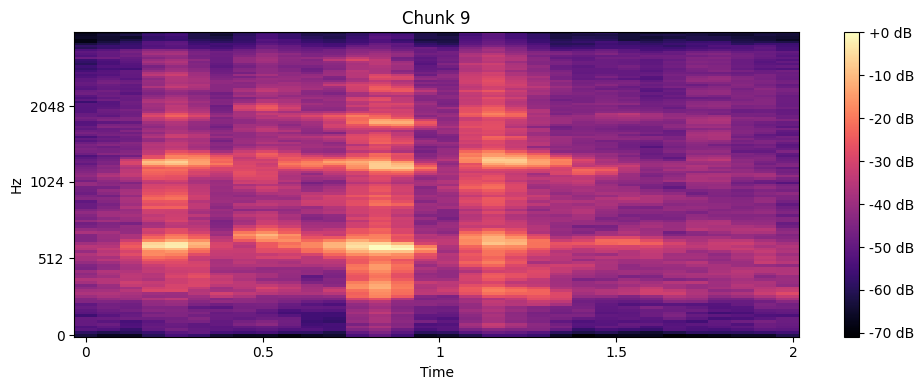

(128, 32)


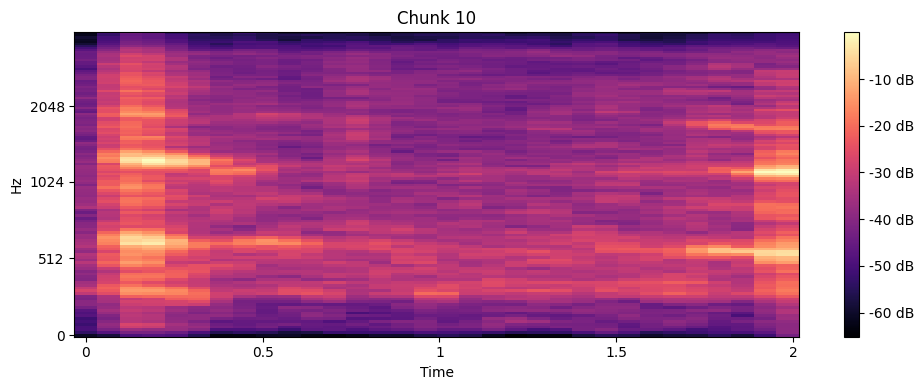

(128, 32)


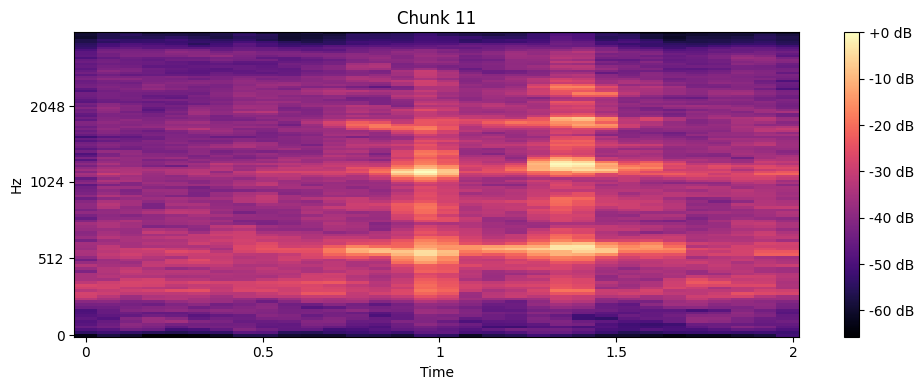

(128, 32)


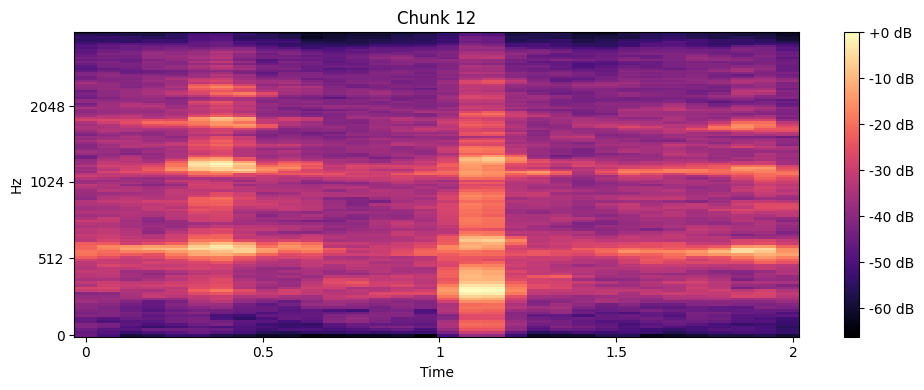

(128, 32)


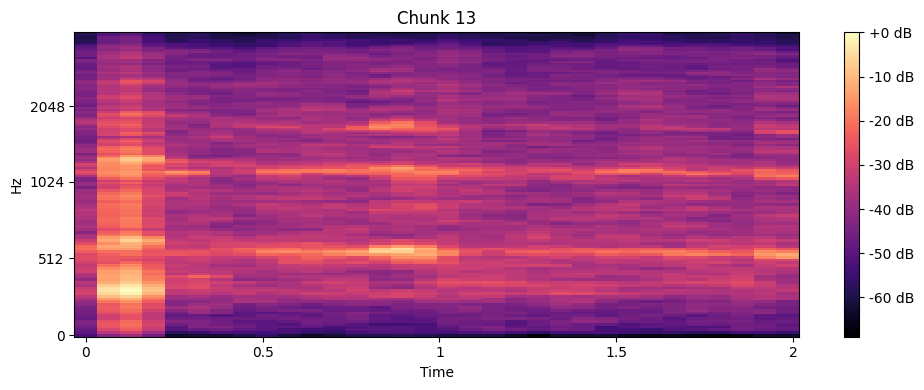

(128, 32)


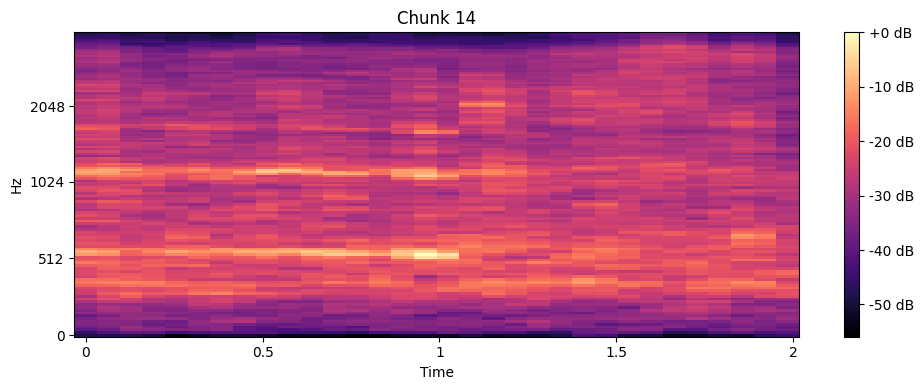

(128, 32)


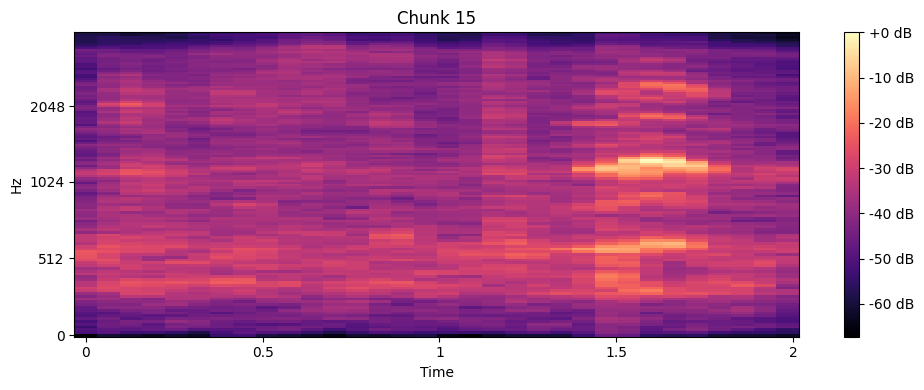

(128, 32)


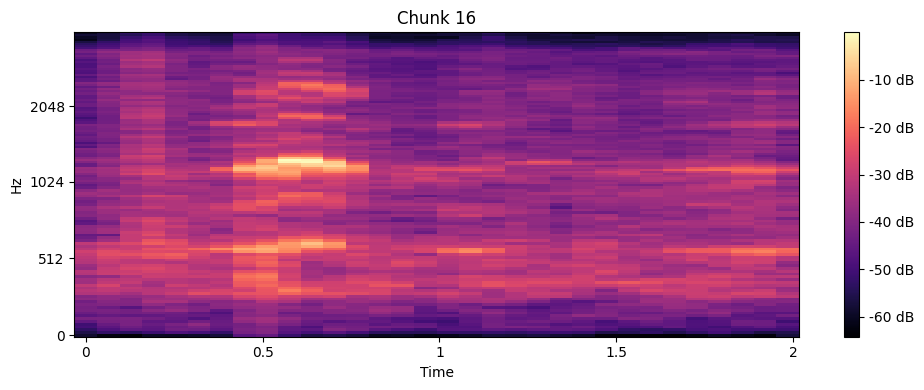

(128, 32)


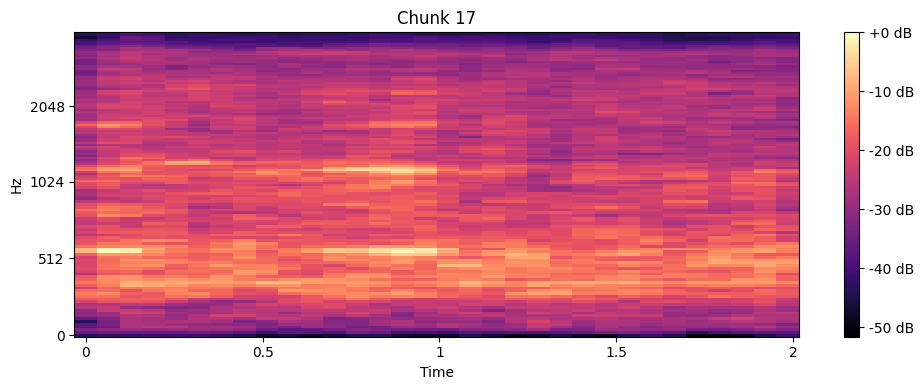

(128, 32)


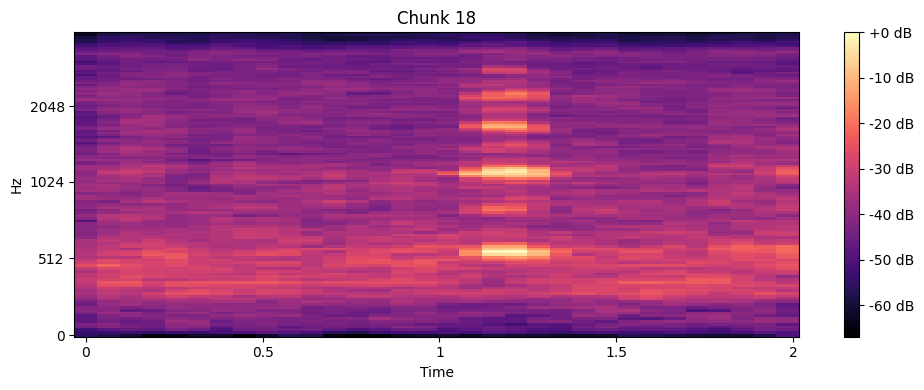

(128, 32)


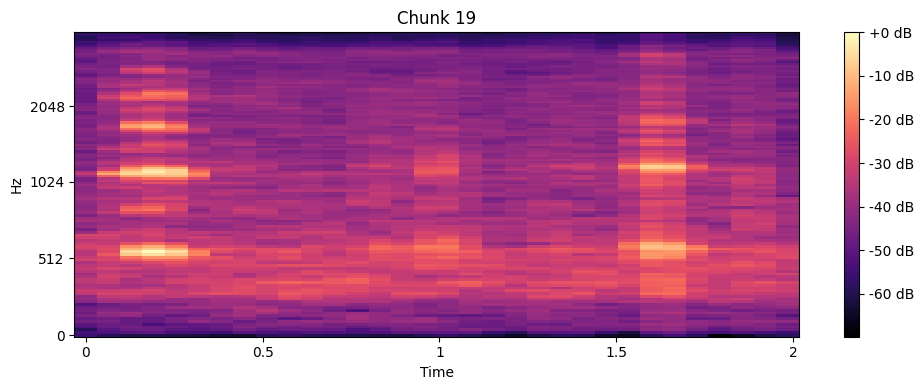

(128, 32)


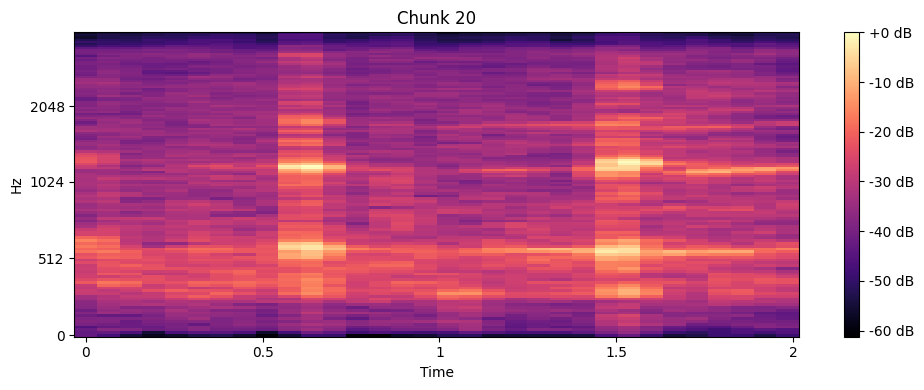

(128, 32)


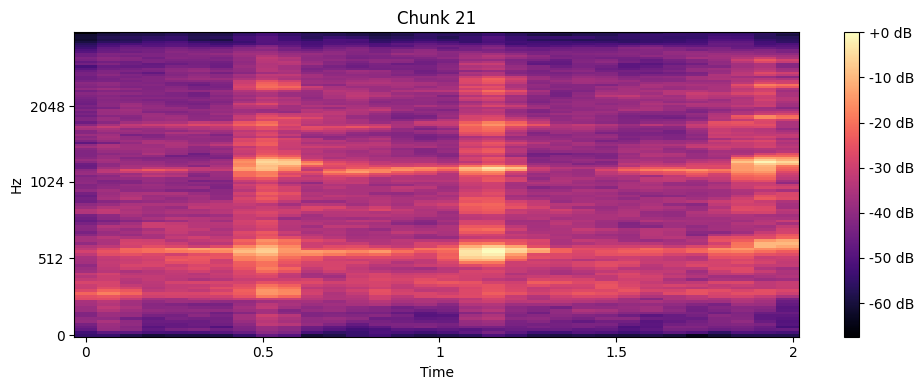

(128, 32)


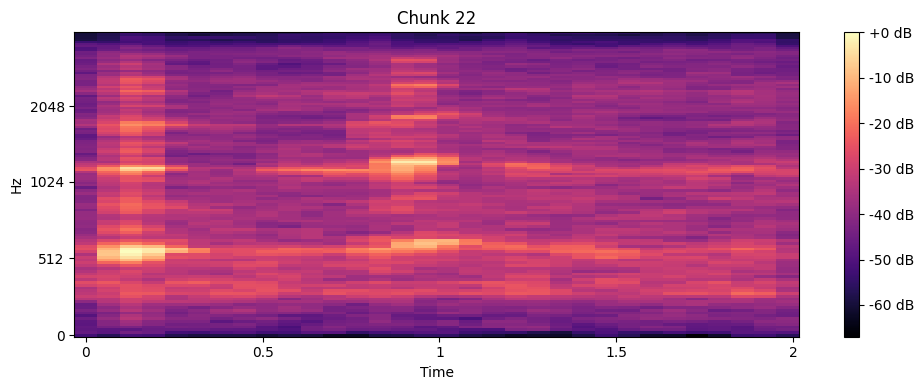

(128, 32)


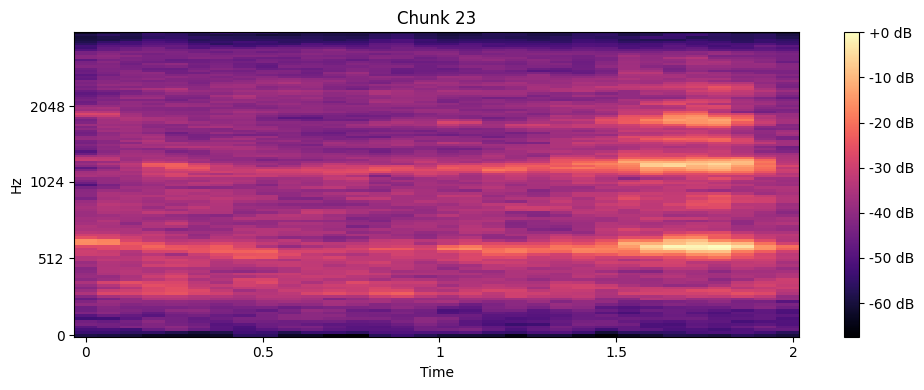

(128, 32)


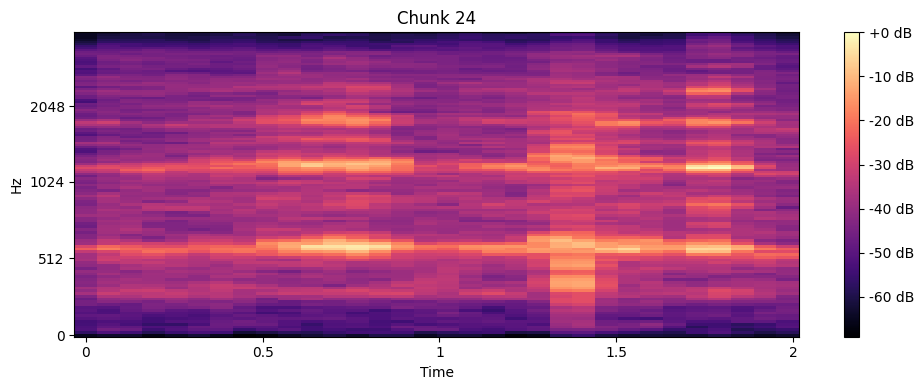

(128, 32)


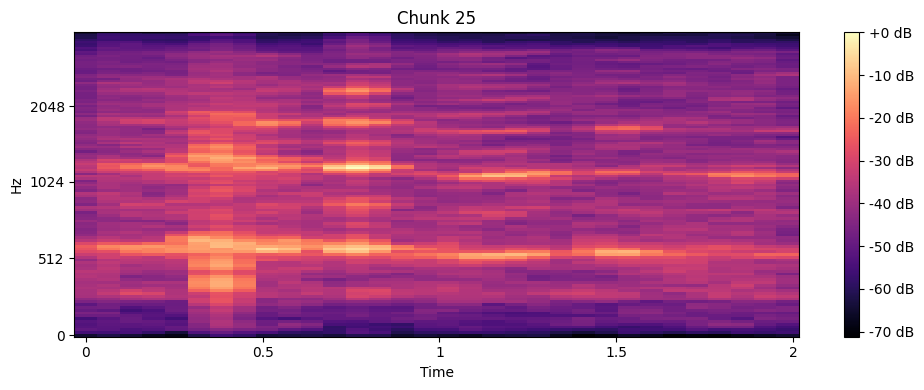

(128, 32)


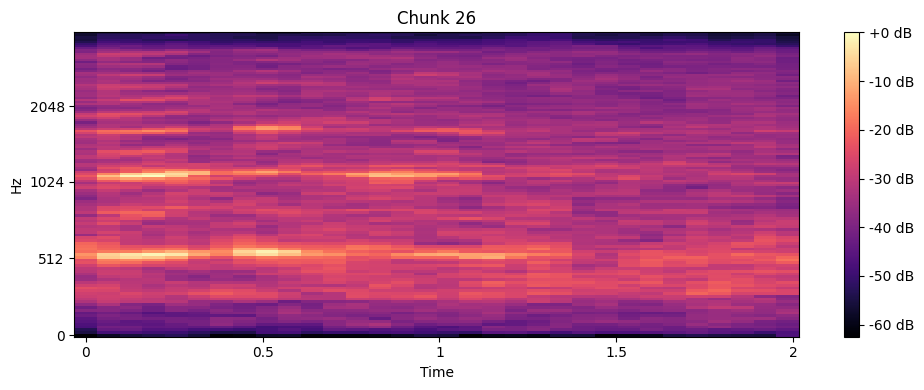

(128, 32)


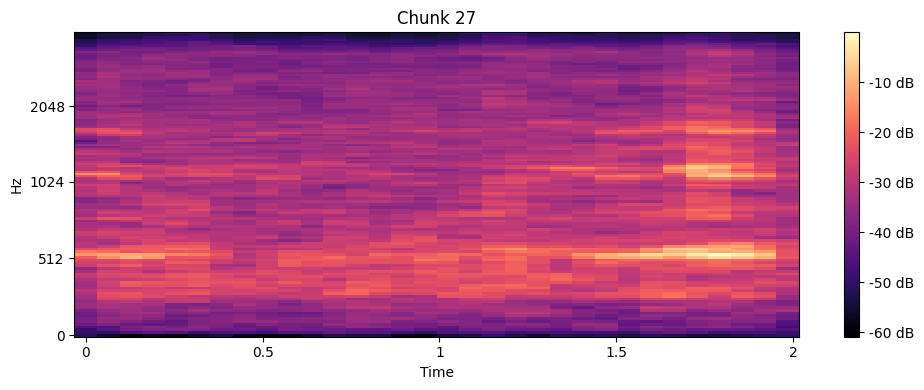

(128, 32)


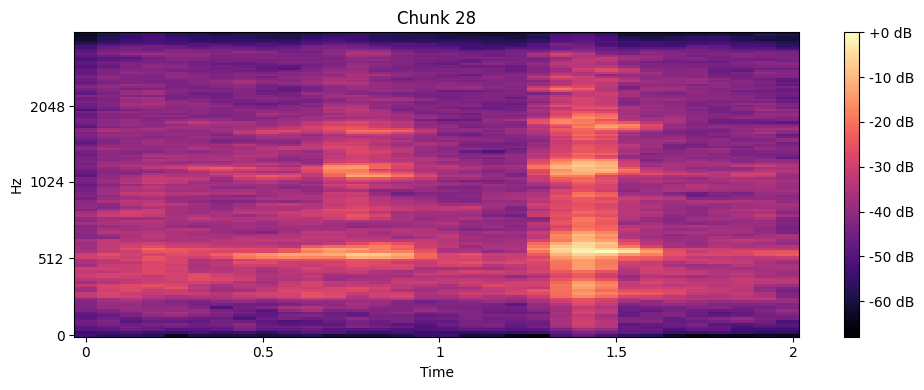

(128, 32)


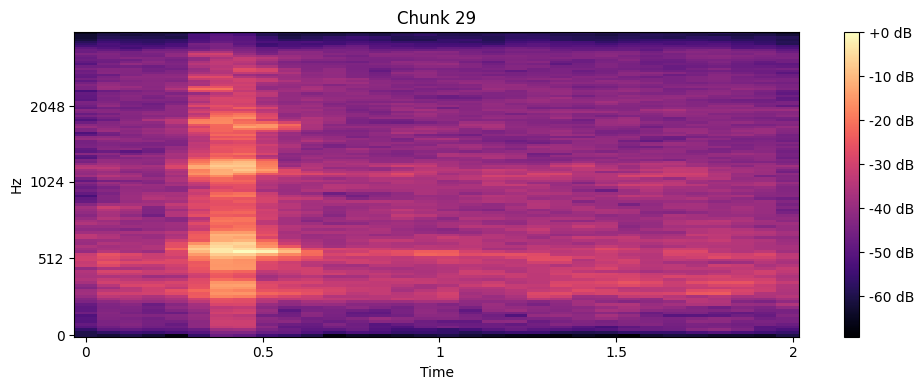

(128, 32)


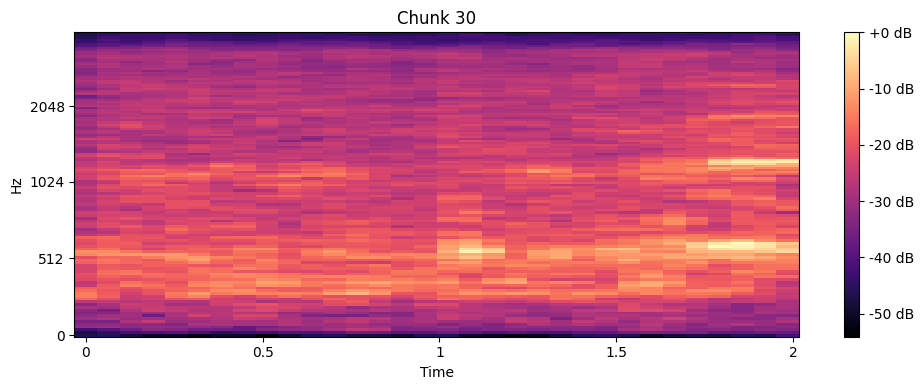

(128, 32)


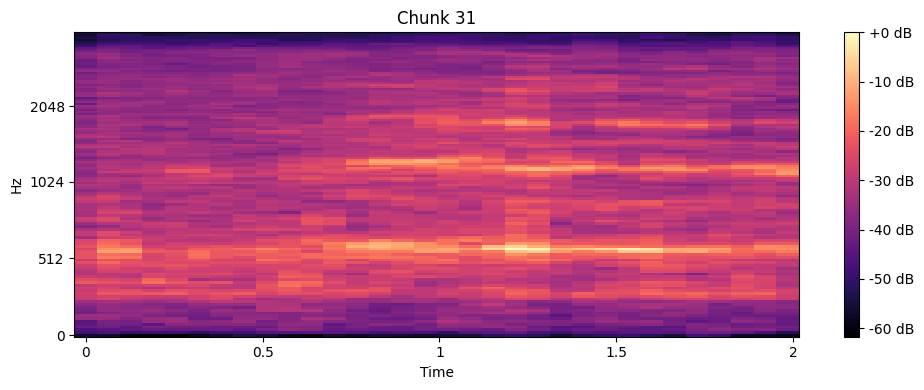

(128, 32)


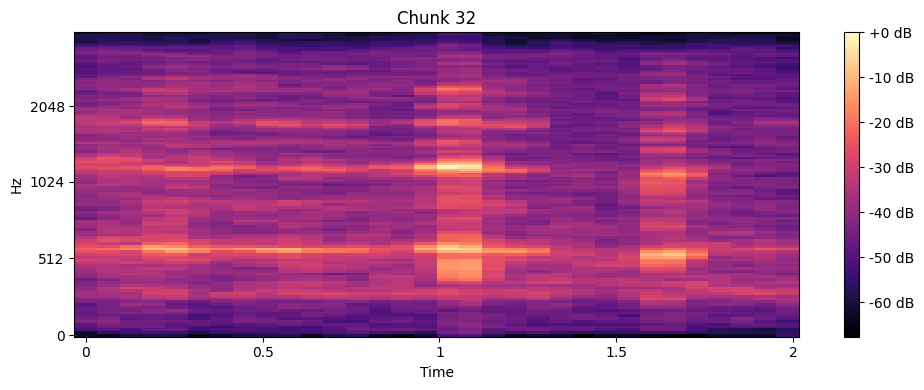

(128, 32)


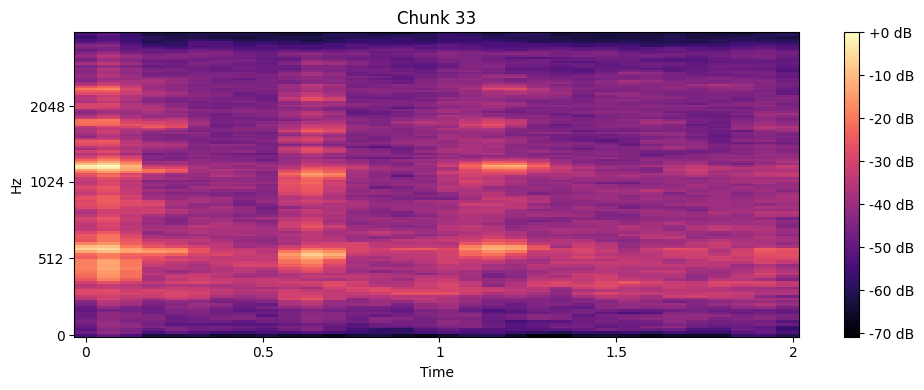

(128, 32)


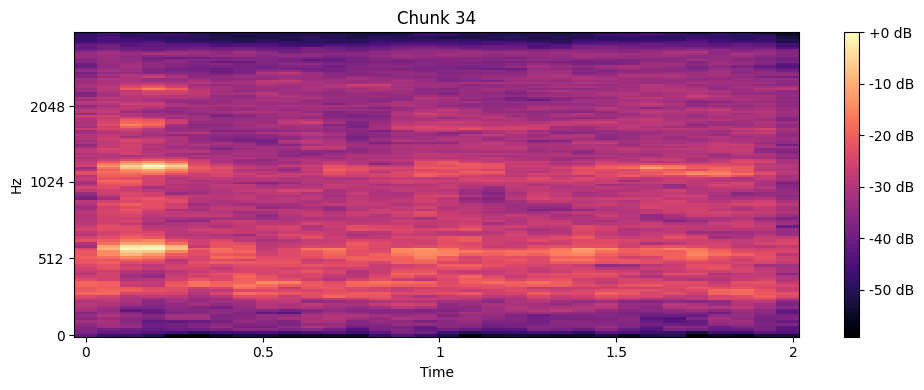

(128, 32)


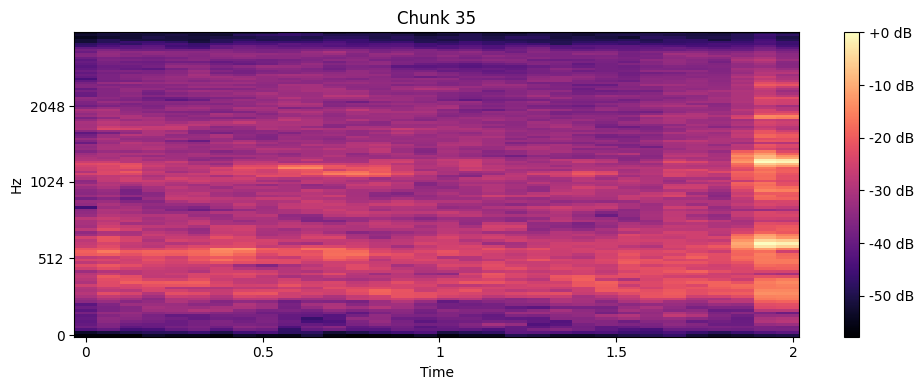

(128, 32)


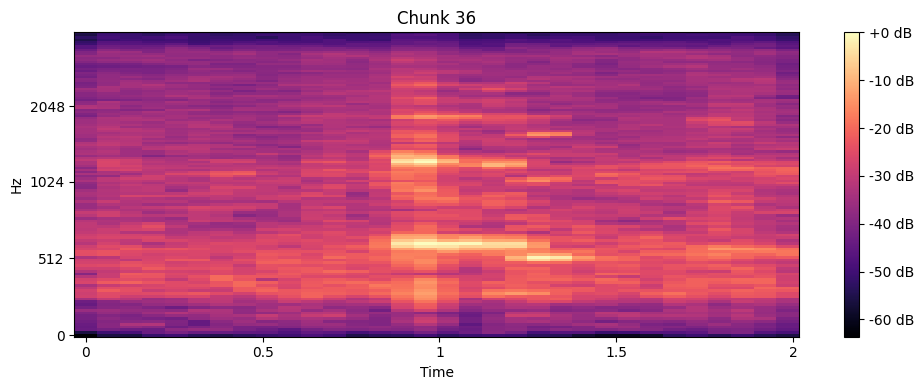

(128, 32)


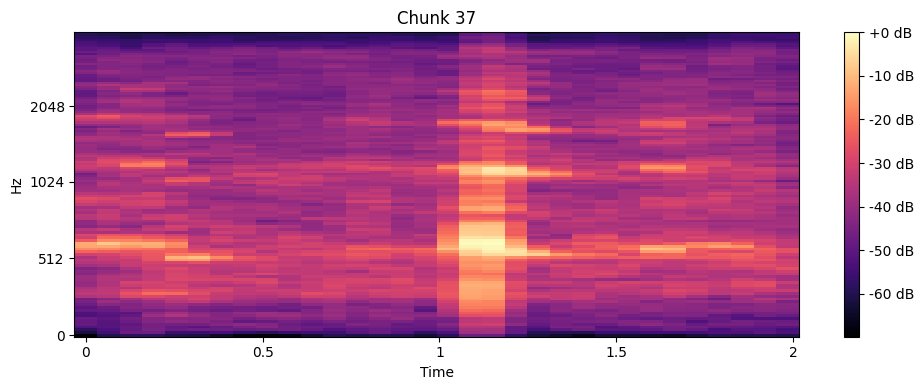

(128, 32)


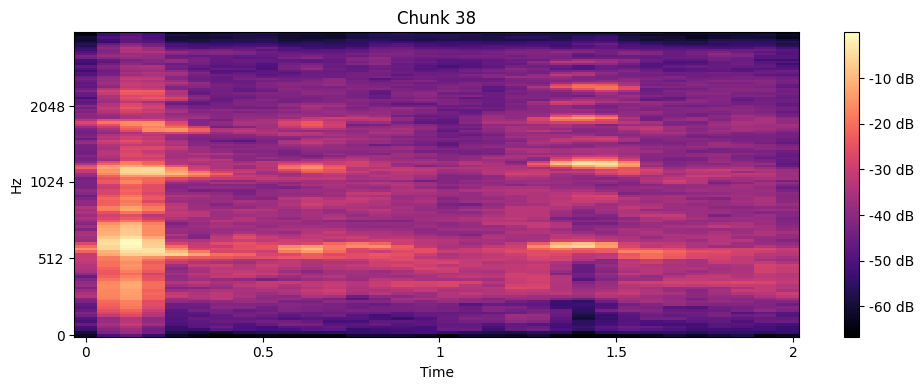

(128, 32)


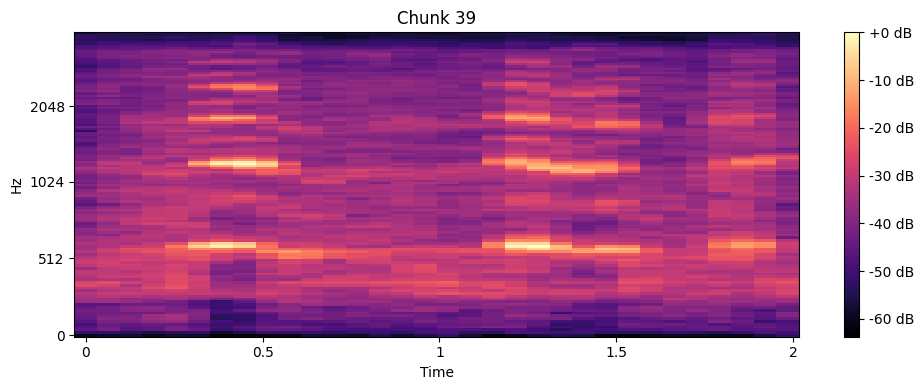

(128, 32)


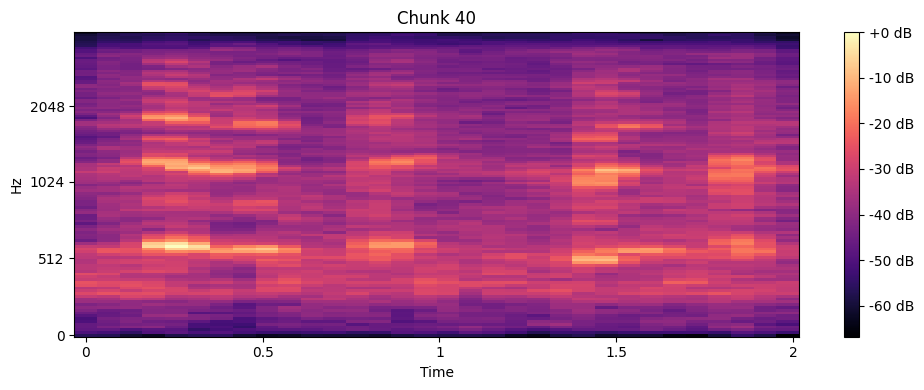

(128, 32)


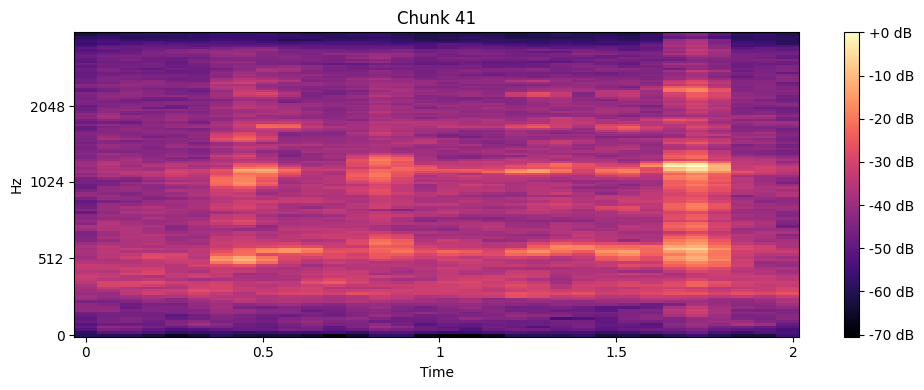

(128, 32)


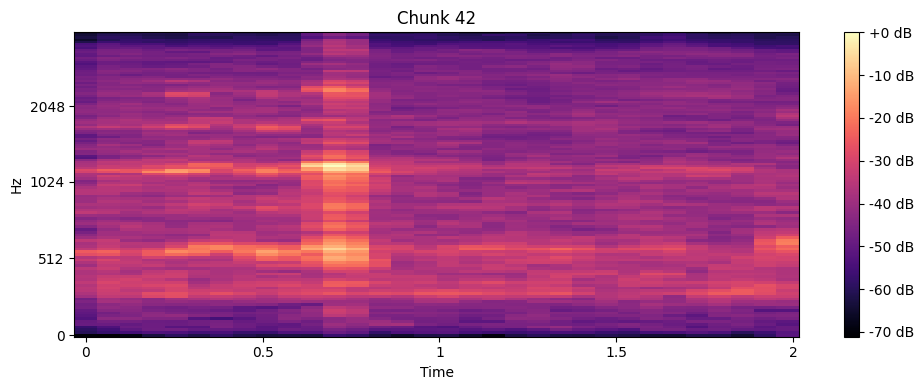

(128, 32)


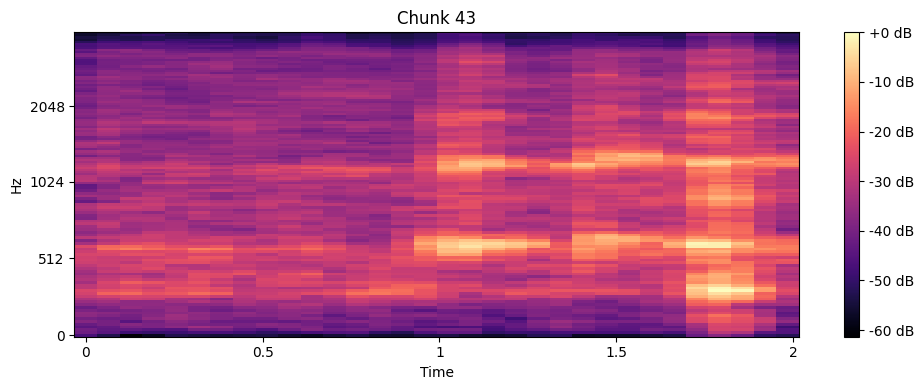

(128, 32)


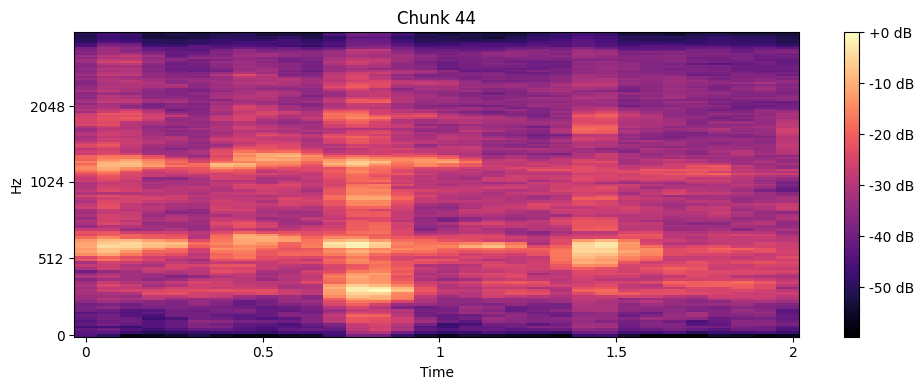

(128, 32)


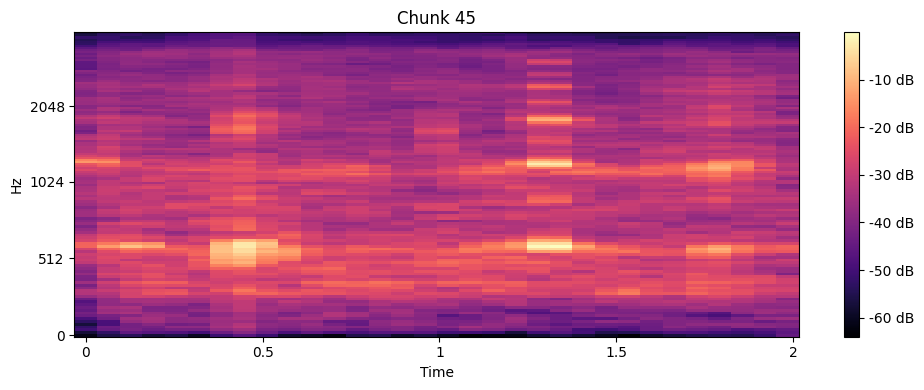

(128, 32)


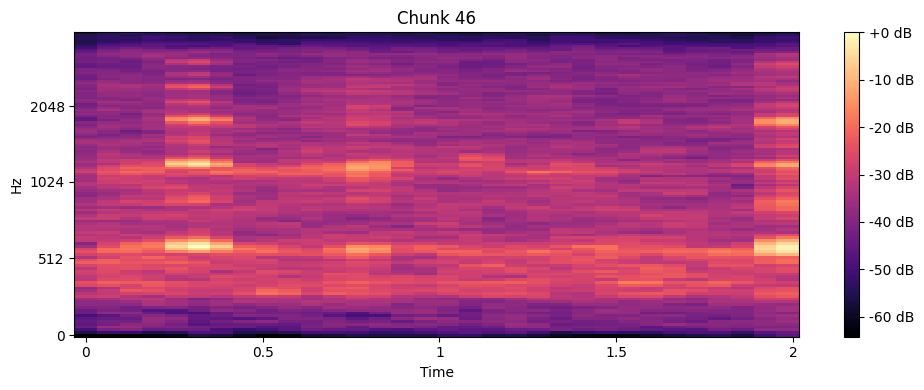

(128, 32)


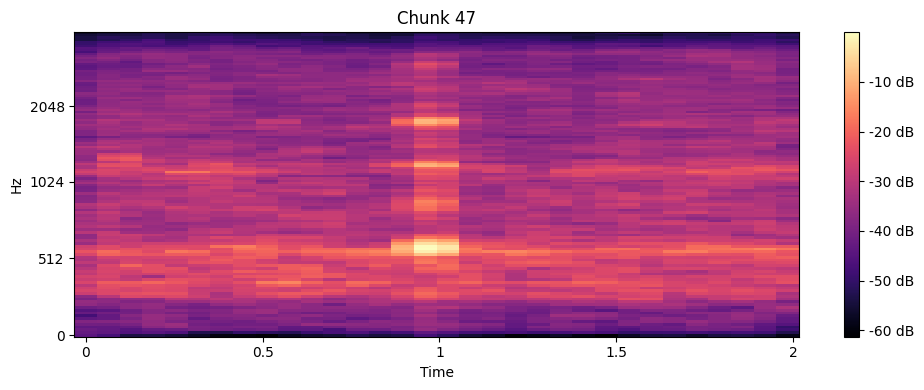

(128, 32)


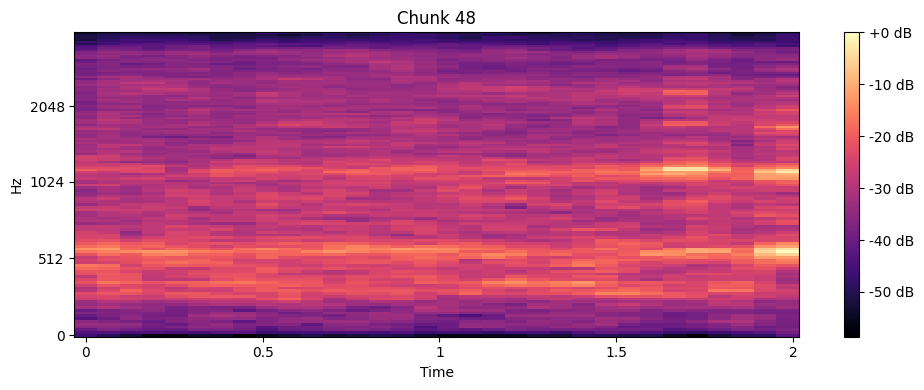

(128, 32)


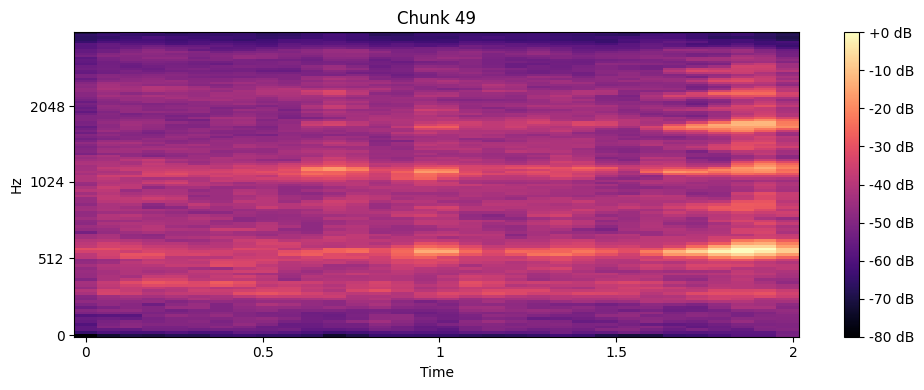

(128, 32)


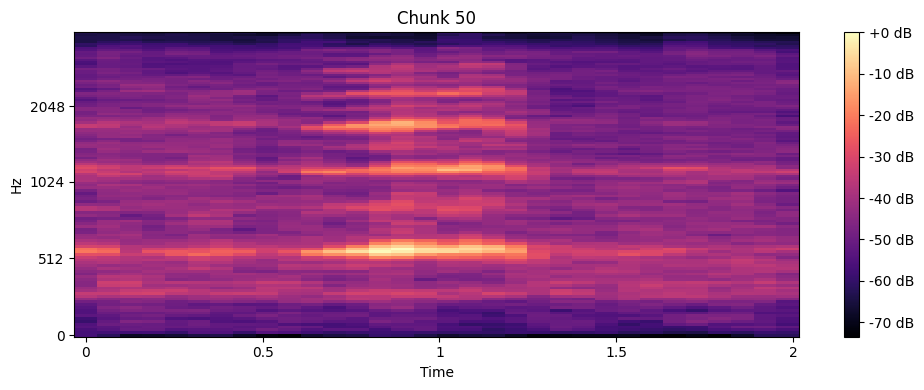

(128, 32)


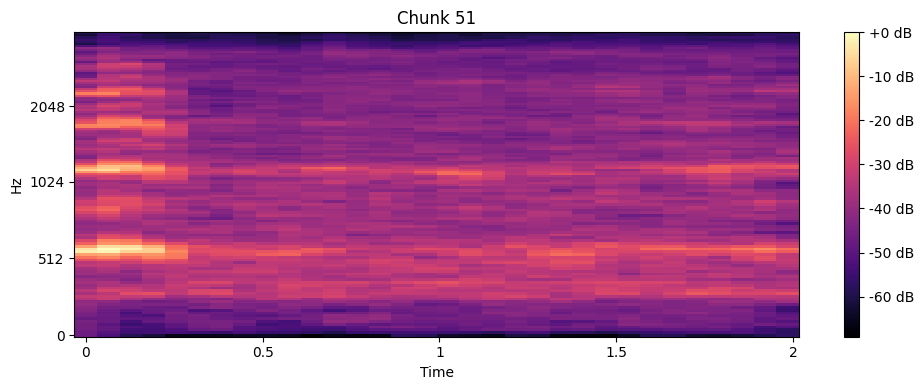

(128, 32)


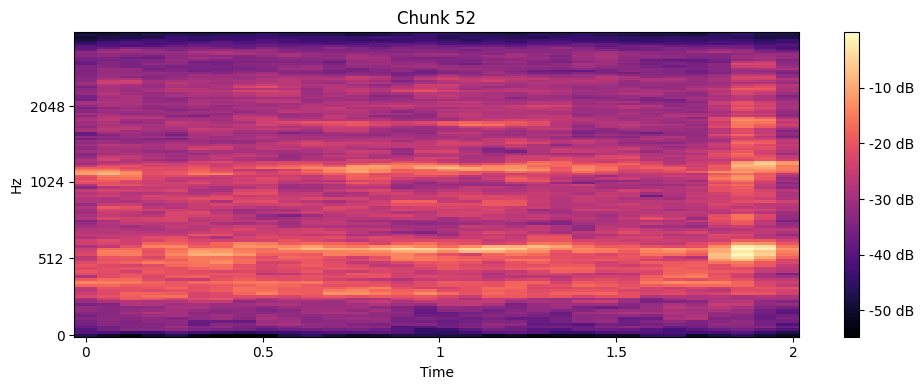

(128, 20)


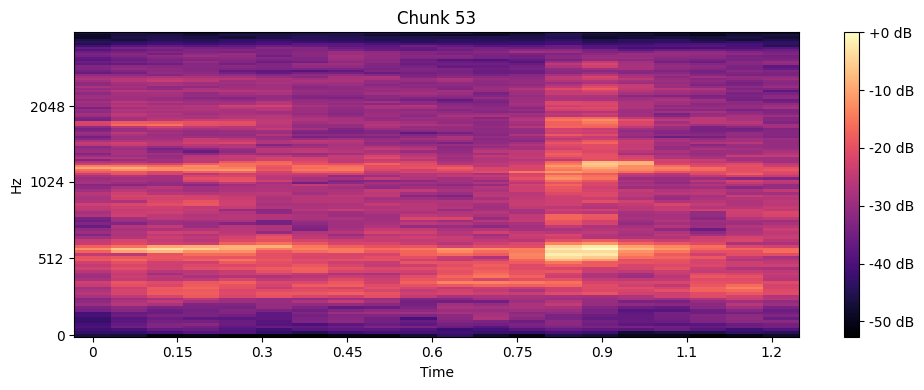

In [13]:
audio_path = "Voice0133.wav"
y, sr = librosa.load(audio_path, sr=None) # sr=None to keep the original sampling rate

plot_melspectrogram_chunks(y, sr)

In [ ]:
128*273

In [ ]:
185*185

---

# Importing Library

In [71]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Data Preprocessing - Final

In [72]:
# define folder paths

data_dir = "Dataset"
classes = ["Aedes Aegypti", "Anopheles Stephensi", "Culex Pipiens"]

In [73]:
import os
import numpy as np
import librosa
from tensorflow.image import resize

# Load and preprocess the audio files
def load_and_preprocess_data(data_dir, classes, target_shape=(180, 180)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print(f"Processing {class_name}...")
        for filename in os.listdir(class_dir):
            if filename.endswith(".wav"):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)

                # Performing pre-processing
                # Define the duration of each chunk and overlap
                chunk_duration = 2
                overlap_duration = 1

                # Convert the duration to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                # Calculate the total number of chunks
                num_chunks = int((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples)) + 1

                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate the start and end indices of the current chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    chunk = audio_data[start:end]

                    # Compute the Mel spectrogram
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate, n_mels=128)
                    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

                    # Resize Mel spectrogram to target shape
                    mel_spectrogram_resized = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

                    # Compute the MFCC
                    mfcc = librosa.feature.mfcc(y=chunk, sr=sample_rate, n_mfcc=13)
                    mfcc_resized = resize(np.expand_dims(mfcc, axis=-1), target_shape)

                    # Concatenate Mel Spectrogram and MFCC along the depth axis
                    combined_features = np.concatenate([mel_spectrogram_resized, mfcc_resized], axis=-1)

                    # Append the combined features and label to the data and labels lists
                    data.append(combined_features)
                    labels.append(i_class)
                    
    # Return the data and labels as numpy arrays
    return np.array(data), np.array(labels)


In [74]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing Aedes Aegypti...
Processing Anopheles Stephensi...
Processing Culex Pipiens...


In [75]:
data.shape

(680, 180, 180, 2)

In [76]:
labels.shape

(680,)

In [77]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(classes))
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [78]:
labels.shape

(680, 3)

## Splitting of Dataset into Training and Testing

In [79]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train.shape


(544, 180, 180, 2)

In [80]:
X_test.shape

(136, 180, 180, 2)

In [81]:
y_train.shape

(544, 3)

In [82]:
y_test.shape

(136, 3)

# Building Model

In [83]:
model = tf.keras.models.Sequential()

In [84]:
X_train[0].shape

(180, 180, 2)

In [85]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [87]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [88]:
model.add(Dropout(0.3))

In [89]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [90]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [91]:
model.add(Dropout(0.3))

In [92]:
model.add(Flatten())

In [93]:
model.add(Dense(units=1200, activation='relu'))

In [94]:
model.add(Dropout(0.45))

In [95]:
# Output layer
model.add(Dense(units=len(classes), activation='softmax'))

In [96]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 180, 180, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1200)           │     5,530,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,246,339 (39.09 MB)

 Trainable params: 10,246,339 (39.09 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.4066 - loss: 1.4577 - val_accuracy: 0.6176 - val_loss: 1.0234
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4681 - loss: 1.0374 - val_accuracy: 0.7353 - val_loss: 0.7813
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6778 - loss: 0.7085 - val_accuracy: 0.7868 - val_loss: 0.4335
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8077 - loss: 0.4557 - val_accuracy: 0.8382 - val_loss: 0.3331
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8345 - loss: 0.3414 - val_accuracy: 0.8309 - val_loss: 0.3582
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8479 - loss: 0.3193 - val_accuracy: 0.8603 - val_loss: 0.2949
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8490 - loss: 0.3078 - val_accuracy: 0.8603 - val_loss: 0.3182
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8431 - loss: 0.2999 - val_accuracy: 0.8603 - val_loss:

In [99]:
model.save("Trained_model.h5")

In [100]:
training_history.history

{'accuracy': [0.39338234066963196,
  0.533088207244873,
  0.716911792755127,
  0.8180146813392639,
  0.8235294222831726,
  0.8363970518112183,
  0.8474264740943909,
  0.8602941036224365,
  0.876838207244873,
  0.8933823704719543,
  0.8952205777168274,
  0.904411792755127,
  0.9117646813392639,
  0.9172794222831726,
  0.9025735259056091,
  0.9227941036224365,
  0.9246323704719543,
  0.9448529481887817,
  0.935661792755127,
  0.9448529481887817,
  0.9650735259056091,
  0.9595588445663452,
  0.9595588445663452,
  0.970588207244873,
  0.9761029481887817,
  0.9834558963775635,
  0.9558823704719543,
  0.9650735259056091,
  0.9852941036224365,
  0.9852941036224365],
 'loss': [1.2885195016860962,
  0.9948692321777344,
  0.6193192005157471,
  0.42390578985214233,
  0.3633258044719696,
  0.3270835876464844,
  0.3081721067428589,
  0.2921142578125,
  0.2645243704319,
  0.23518387973308563,
  0.25344499945640564,
  0.21222464740276337,
  0.19337379932403564,
  0.18164385855197906,
  0.226031318306

In [101]:
# Recording History in json
import json

with open("training_history.json", "w") as f:
    json.dump(training_history.history, f)

In [102]:
X_train

array([[[[-7.7367859e+01, -6.9572968e+02],
         [-7.6155281e+01, -6.8753711e+02],
         [-7.6367882e+01, -6.8311340e+02],
         ...,
         [-7.6506699e+01, -6.8125165e+02],
         [-7.2682411e+01, -6.8440051e+02],
         [-7.0755913e+01, -6.9064435e+02]],

        [[-7.8859406e+01, -6.9572968e+02],
         [-7.8333954e+01, -6.8753711e+02],
         [-7.8426079e+01, -6.8311340e+02],
         ...,
         [-7.6283577e+01, -6.8125165e+02],
         [-7.0112617e+01, -6.8440051e+02],
         [-6.8072868e+01, -6.9064435e+02]],

        [[-8.0000000e+01, -6.9572968e+02],
         [-8.0000000e+01, -6.8753711e+02],
         [-8.0000000e+01, -6.8311340e+02],
         ...,
         [-7.3996269e+01, -6.8125165e+02],
         [-6.6866318e+01, -6.8440051e+02],
         [-6.5713600e+01, -6.9064435e+02]],

        ...,

        [[-8.0000000e+01, -9.2492658e-01],
         [-8.0000000e+01, -3.2327571e+00],
         [-8.0000000e+01, -2.3645585e+00],
         ...,
         [-8.0000000e

In [103]:
# Reload the model

model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 180, 180, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1200)           │     5,530,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,246,341 (39.09 MB)

 Trainable params: 10,246,339 (39.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [104]:
# Reload the training history
import json

with open("training_history.json", "r") as json_file:
    training_history_data = json.load(json_file)

In [105]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Evaluation

In [106]:
# Model Evaluation on Training set

train_loss, train_Accuracy = model.evaluate(X_train, y_train)


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - accuracy: 0.9942 - loss: 0.0233


In [107]:
train_loss, train_Accuracy

(0.020198825746774673, 0.9963235259056091)

In [108]:
# Model Evaluation on Testing set

val_loss, val_accuracy = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.8650 - loss: 0.4573


In [109]:
val_loss, val_accuracy

(0.40765440464019775, 0.875)

In [110]:
training_history_data['val_loss']

[1.0234296321868896,
 0.7812779545783997,
 0.4335334599018097,
 0.3330962359905243,
 0.3582429587841034,
 0.2949056923389435,
 0.31820157170295715,
 0.2965438961982727,
 0.3274180591106415,
 0.28499171137809753,
 0.2891075313091278,
 0.25151973962783813,
 0.276165634393692,
 0.2949464023113251,
 0.2788005471229553,
 0.26715022325515747,
 0.3072044849395752,
 0.28533515334129333,
 0.28533935546875,
 0.2734193205833435,
 0.3286727964878082,
 0.36209869384765625,
 0.2803591191768646,
 0.2560768723487854,
 0.2468491494655609,
 0.2753424346446991,
 0.45210200548171997,
 0.27918684482574463,
 0.36300206184387207,
 0.40765440464019775]

## Accuracy and Loss Viualization

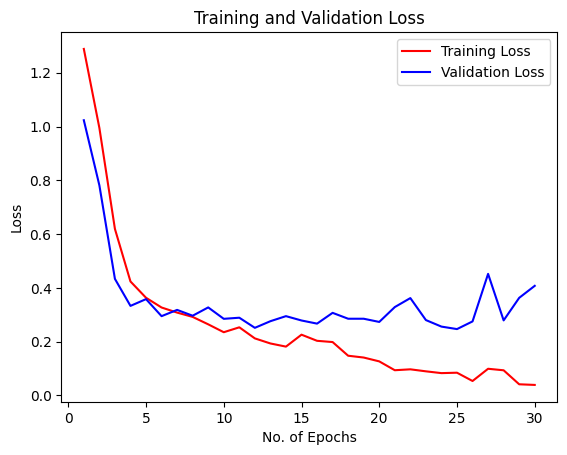

In [111]:
# Plotting the Training and Validation Loss
epochs = [i for i in range(1, 31)]
plt.plot(epochs, training_history_data['loss'], label='Training Loss', color='red')
plt.plot(epochs, training_history_data['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

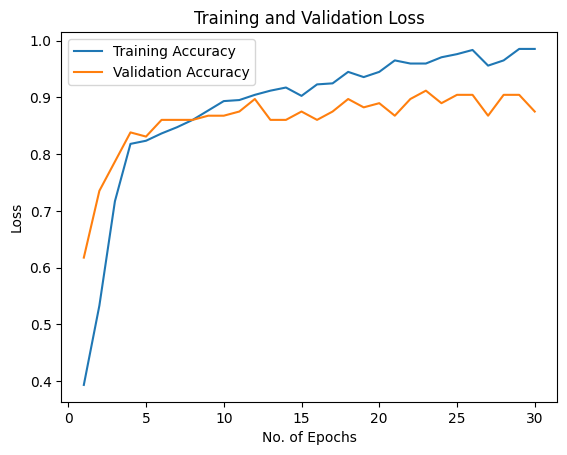

In [112]:
# Plotting the Training and Validation Accuracy
epochs = [i for i in range(1, 31)]
plt.plot(epochs, training_history_data['accuracy'], label='Training Accuracy')
plt.plot(epochs, training_history_data['val_accuracy'], label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Precision, Recall, Confusion Matrix - Model Evaluation II

In [113]:
X_test.shape

(136, 180, 180, 2)

In [114]:
y_pred = model.predict(X_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step


array([[4.64518453e-05, 5.43769635e-02, 9.45576608e-01],
       [1.56143564e-04, 5.64277709e-01, 4.35566127e-01],
       [9.94024098e-01, 2.13239720e-04, 5.76256867e-03],
       [2.73228889e-05, 7.16934144e-01, 2.83038467e-01],
       [1.00000000e+00, 1.16568515e-15, 9.82043985e-15],
       [3.81129803e-06, 9.89009917e-01, 1.09862415e-02],
       [1.00000000e+00, 1.35201531e-10, 1.00880460e-08],
       [1.00000000e+00, 6.33887694e-17, 1.84254823e-14],
       [6.57302371e-05, 2.49899581e-01, 7.50034630e-01],
       [2.26412195e-10, 1.00000000e+00, 5.39325917e-08],
       [9.99115527e-01, 7.06607476e-04, 1.77861744e-04],
       [1.00000000e+00, 1.41594538e-15, 1.19716953e-12],
       [1.00000000e+00, 6.13554160e-15, 6.98252775e-11],
       [1.50534415e-05, 6.62678123e-01, 3.37306768e-01],
       [1.00000000e+00, 1.27606200e-14, 2.24953059e-13],
       [9.99998808e-01, 4.19292157e-08, 1.16028866e-06],
       [1.00000000e+00, 5.35469771e-16, 5.89880792e-14],
       [9.85341370e-01, 1.45681

In [115]:
y_pred.shape

(136, 3)

In [116]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2,
       0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2,
       0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 2], dtype=int64)

In [117]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [118]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 2], dtype=int64)

In [119]:
classes

['Aedes Aegypti', 'Anopheles Stephensi', 'Culex Pipiens']

In [120]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_categories, predicted_categories)

# Precision, Recall, F1-Score
print(classification_report(true_categories, predicted_categories, target_names=classes))


                     precision    recall  f1-score   support

      Aedes Aegypti       0.99      0.97      0.98        75
Anopheles Stephensi       0.68      0.88      0.77        32
      Culex Pipiens       0.86      0.62      0.72        29

           accuracy                           0.88       136
          macro avg       0.84      0.82      0.82       136
       weighted avg       0.89      0.88      0.87       136



### Confusion Matrix Visualization

In [121]:
cm

array([[73,  2,  0],
       [ 1, 28,  3],
       [ 0, 11, 18]], dtype=int64)

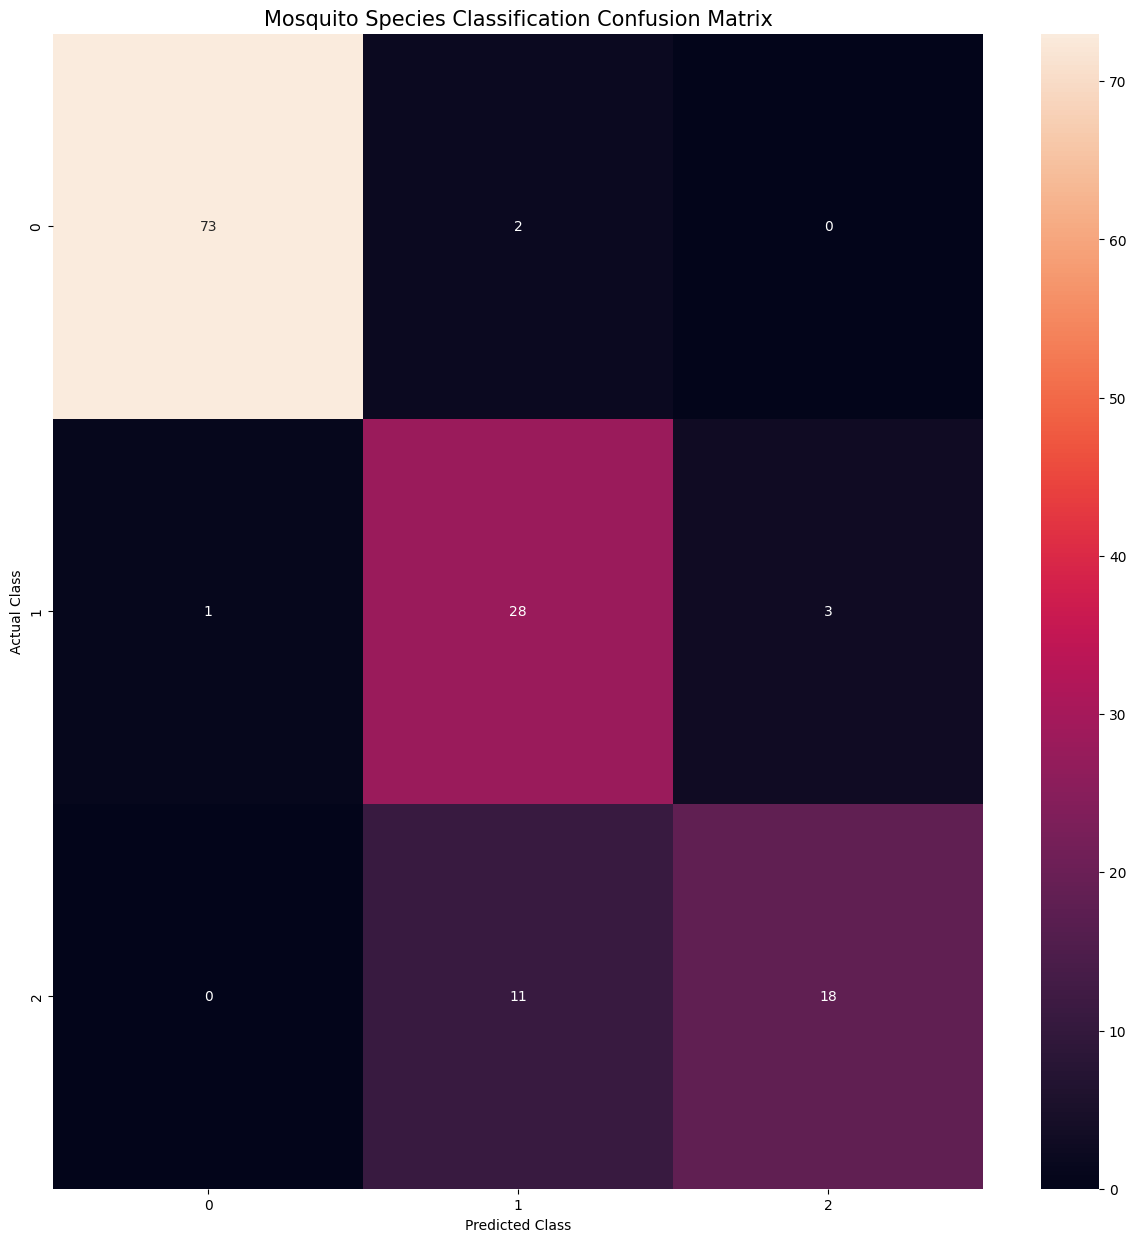

In [122]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, annot_kws={'size': 10})
plt.xlabel('Predicted Class', fontsize=10)
plt.ylabel('Actual Class', fontsize=10)
plt.title('Mosquito Species Classification Confusion Matrix', fontsize=15)
plt.show()